In [1]:
%store -r __toolboxforsalesdata

In [2]:
__toolboxforsalesdata

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
df_train = pd.read_csv('train_full_lag1_lag2_season.csv')

In [4]:
df_train.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
df_test = pd.read_csv('test_full_lag1_lag2_seasonal.csv')

In [6]:
df_test.drop("Unnamed: 0", axis = 1, inplace = True)

In [7]:
train_33, val_33 = month_split(df_train, 33)

In [8]:
train_33.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765


In [9]:
val_33.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature
1577591,2,31,33,399.0,1.0,37,False,NaN,9.0,2989.0,1.507259,NaN,1.962963,-0.063765
1577592,2,486,33,300.0,3.0,73,False,1.0,110.0,260.0,2.044248,NaN,3.666667,-0.063765
1577593,2,787,33,420.0,1.0,49,False,NaN,22.0,580.0,1.806962,NaN,2.800000,-0.063765
1577594,2,794,33,3300.0,1.0,73,False,NaN,7.0,260.0,2.044248,NaN,1.333333,-0.063765
1577595,2,968,33,58.0,1.0,40,False,NaN,10.0,6779.0,1.614451,NaN,1.111111,-0.063765


In [10]:
len(np.unique(df_train['item_category_id']))

84

In [11]:
len(np.unique(df_test['item_category_id']))

15306

In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors

In [13]:
??NearestNeighbors

In [14]:
df_test.columns

Index(['ID', 'shop_id', 'item_id', 'item_category_id', 'indicator', 'is_music',
       'lag_shop_item_comb', 'lag_only_item', 'item_price',
       'lag_only_item_cat', 'unique', 'lag2_only_item_cat', 'lag2_only_item',
       'lag2_shop_item_comb', 'seasonal_freq_3_feature'],
      dtype='object')

In [15]:
#Imputing all Nans with zero in lag columns as only if there were no sales in lagged features that we have got nan,
#But this is wrong for unique 0 (lag1,lag2) and unique (lag2) as we do not have information about these, therefore moving with
#some assumption.
train_33_imputed = train_33.fillna(0)

In [16]:
val_33_imputed = val_33.fillna(0)

In [17]:
test_33_imputed = df_test[df_test.columns.difference(['shop_id', 'ID', 'item_id', 'item_category_id', 'indicator', 'is_music', 'item_price'])].fillna(0)

In [18]:
sum(pd.isnull(df_test['is_music']))

15246

In [19]:
test_33_imputed_f = pd.concat([df_test[['shop_id', 'ID', 'item_id', 'item_category_id', 'indicator', 'is_music', 'item_price']], test_33_imputed], axis = 1)

In [21]:
train_33_imputed.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature
0,0,32,0,221.0,6.0,40,False,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765
1,0,33,0,347.0,3.0,37,False,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765
2,0,35,0,247.0,1.0,40,False,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765
3,0,43,0,221.0,1.0,40,False,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765
4,0,51,0,128.5,2.0,57,True,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765


In [ ]:
#Trying features based on nearest categories


In [ ]:
#Mean of is_music/is_not music in that month

In [62]:
#With trimmed item_cnt_month
train_33_imputed_copy = train_33_imputed.copy()

In [68]:
#Trimming tha target_valraible to [0,20]
train_33_imputed.loc[train_33_imputed['item_cnt_month']>20, 'item_cnt_month'] = 20
train_33_imputed.loc[train_33_imputed['item_cnt_month']<0, 'item_cnt_month'] = 0

In [69]:
#Trimming tha target_valraible to [0,20]
val_33_imputed.loc[val_33_imputed['item_cnt_month']>20, 'item_cnt_month'] = 20
val_33_imputed.loc[val_33_imputed['item_cnt_month']<0, 'item_cnt_month'] = 0

In [80]:
category_encoding_monthly = train_33_imputed.groupby(['unique','item_category_id'])['item_cnt_month'].mean().reset_index()

In [81]:
category_encoding_monthly_fook = music_encoding_monthly.groupby(['unique']).agg({'item_cnt_month':np.max, 'item_category_id':lambda x: x.iloc[0]})

In [85]:
#Now this is good to see, but I cant use this feature directly as I would have no info about sales for test, thats why I could 
#use lagged values for the features. But then nan's again[Will manage]. Make the feature/
category_encoding_monthly['unique'] = category_encoding_monthly['unique'] + 1

In [89]:
category_encoding_monthly.rename(columns={'lag': 'prev_month_category_mean'}, inplace=True)

In [91]:
train_33_imputed_copy = train_33_imputed_copy.merge(category_encoding_monthly, how='left', on = ['unique','item_category_id'])

In [97]:
train_33_imputed = train_33_imputed.merge(category_encoding_monthly, how='left', on = ['unique','item_category_id'])

In [99]:
val_33_imputed = val_33_imputed.merge(category_encoding_monthly, how='left', on = ['unique','item_category_id'])

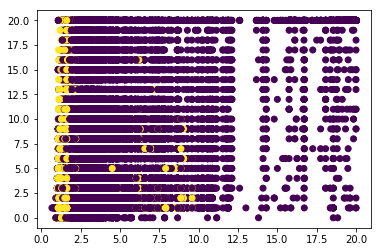

In [105]:
plt.figure(1)
plt.scatter(x = 'prev_month_category_mean', y = 'item_cnt_month', data = train_33_imputed, c='is_music')
plt.show()

In [107]:
train_33_imputed.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_cnt_month',
       'item_category_id', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature',
       'prev_month_category_mean'],
      dtype='object')

In [111]:
monitoring_data = pd.read_csv('monitoring_data.csv')

In [112]:
monitoring_data

,Unnamed: 0,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score,Features
0,0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.152129,2.163706,1.17125,Lag1
1,1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.152377,2.160372,1.16766,Lag1
2,2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.782377,2.151485,1.14767,Lag1
3,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092,ensemble_lin_xgb_0092_lag1_lag2_season,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.935000,2.047780,1.09124,Lag1_Lag2_Seasonal
4,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092_less_0025,ensemble_lin_xgb_0092_lag1_lag2_season_less_0025,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.936000,2.050922,1.09067,Lag1_Lag2_Seasonal


In [109]:
xg_train = xgboost.DMatrix(train_33_imputed.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_33_imputed['item_cnt_month'])
xg_val = xgboost.DMatrix(val_33_imputed.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=val_33_imputed['item_cnt_month'])

In [113]:
param_set_trimmed = {'max_depth': 6, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 1,'eval_metric': 'rmse'}


In [115]:
progress = {}
xgb_model_trimmed_target = xgboost.train(param_set_trimmed , xg_train,early_stopping_rounds=10,evals = [(xg_train , "train_set"),(xg_val,"validation_set")], evals_result=progress
                                         ,num_boost_round=1000)

[0]	train_set-rmse:2.97907	validation_set-rmse:2.91003
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 10 rounds.
[1]	train_set-rmse:2.96287	validation_set-rmse:2.89582
[2]	train_set-rmse:2.94691	validation_set-rmse:2.88186
[3]	train_set-rmse:2.93118	validation_set-rmse:2.86812
[4]	train_set-rmse:2.91567	validation_set-rmse:2.85454
[5]	train_set-rmse:2.90039	validation_set-rmse:2.84126
[6]	train_set-rmse:2.88533	validation_set-rmse:2.82803
[7]	train_set-rmse:2.87048	validation_set-rmse:2.81513
[8]	train_set-rmse:2.85588	validation_set-rmse:2.80236
[9]	train_set-rmse:2.84147	validation_set-rmse:2.78989
[10]	train_set-rmse:2.82728	validation_set-rmse:2.77761
[11]	train_set-rmse:2.81331	validation_set-rmse:2.76564
[12]	train_set-rmse:2.79953	validation_set-rmse:2.75379
[13]	train_set-rmse:2.78595	validation_set-rmse:2.74204
[14]	train_set-rmse:2.77253	validation_set-rmse:2.73026
[15]	tr

[144]	train_set-rmse:2.03869	validation_set-rmse:2.14287
[145]	train_set-rmse:2.03697	validation_set-rmse:2.1417
[146]	train_set-rmse:2.03536	validation_set-rmse:2.14072
[147]	train_set-rmse:2.03368	validation_set-rmse:2.13967
[148]	train_set-rmse:2.03214	validation_set-rmse:2.13872
[149]	train_set-rmse:2.0306	validation_set-rmse:2.13783
[150]	train_set-rmse:2.02902	validation_set-rmse:2.13673
[151]	train_set-rmse:2.02749	validation_set-rmse:2.13584
[152]	train_set-rmse:2.02603	validation_set-rmse:2.13494
[153]	train_set-rmse:2.02453	validation_set-rmse:2.13424
[154]	train_set-rmse:2.02314	validation_set-rmse:2.13337
[155]	train_set-rmse:2.02167	validation_set-rmse:2.13257
[156]	train_set-rmse:2.02025	validation_set-rmse:2.13153
[157]	train_set-rmse:2.01884	validation_set-rmse:2.13071
[158]	train_set-rmse:2.0174	validation_set-rmse:2.13001
[159]	train_set-rmse:2.0161	validation_set-rmse:2.12928
[160]	train_set-rmse:2.01471	validation_set-rmse:2.12858
[161]	train_set-rmse:2.01339	valida

[289]	train_set-rmse:1.93035	validation_set-rmse:2.08732
[290]	train_set-rmse:1.93002	validation_set-rmse:2.08716
[291]	train_set-rmse:1.92972	validation_set-rmse:2.087
[292]	train_set-rmse:1.92939	validation_set-rmse:2.08692
[293]	train_set-rmse:1.92906	validation_set-rmse:2.08678
[294]	train_set-rmse:1.92875	validation_set-rmse:2.08661
[295]	train_set-rmse:1.9284	validation_set-rmse:2.0865
[296]	train_set-rmse:1.92811	validation_set-rmse:2.08639
[297]	train_set-rmse:1.9278	validation_set-rmse:2.0863
[298]	train_set-rmse:1.92745	validation_set-rmse:2.08622
[299]	train_set-rmse:1.92715	validation_set-rmse:2.08613
[300]	train_set-rmse:1.92681	validation_set-rmse:2.08602
[301]	train_set-rmse:1.9265	validation_set-rmse:2.08588
[302]	train_set-rmse:1.92621	validation_set-rmse:2.08577
[303]	train_set-rmse:1.92588	validation_set-rmse:2.08569
[304]	train_set-rmse:1.92559	validation_set-rmse:2.08557
[305]	train_set-rmse:1.92532	validation_set-rmse:2.08545
[306]	train_set-rmse:1.92503	validatio

[434]	train_set-rmse:1.89705	validation_set-rmse:2.07701
[435]	train_set-rmse:1.89697	validation_set-rmse:2.07699
[436]	train_set-rmse:1.89686	validation_set-rmse:2.07693
[437]	train_set-rmse:1.8966	validation_set-rmse:2.07685
[438]	train_set-rmse:1.89647	validation_set-rmse:2.07685
[439]	train_set-rmse:1.89636	validation_set-rmse:2.07687
[440]	train_set-rmse:1.89619	validation_set-rmse:2.07685
[441]	train_set-rmse:1.89607	validation_set-rmse:2.07685
[442]	train_set-rmse:1.89582	validation_set-rmse:2.07669
[443]	train_set-rmse:1.89569	validation_set-rmse:2.07671
[444]	train_set-rmse:1.89553	validation_set-rmse:2.07642
[445]	train_set-rmse:1.89544	validation_set-rmse:2.0764
[446]	train_set-rmse:1.89534	validation_set-rmse:2.07639
[447]	train_set-rmse:1.89522	validation_set-rmse:2.07639
[448]	train_set-rmse:1.89508	validation_set-rmse:2.07605
[449]	train_set-rmse:1.89493	validation_set-rmse:2.07579
[450]	train_set-rmse:1.89477	validation_set-rmse:2.07577
[451]	train_set-rmse:1.89453	vali

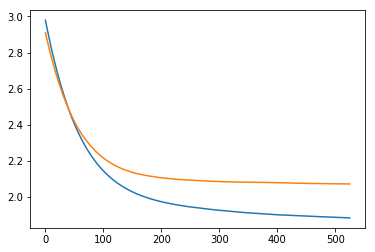

In [119]:
plt.plot(progress['train_set']['rmse'])
plt.plot(progress['validation_set']['rmse'])
plt.show()

In [128]:
for_plot = pd.DataFrame([(v, k) for k, v in xgb_model_trimmed_target.get_fscore().items()])

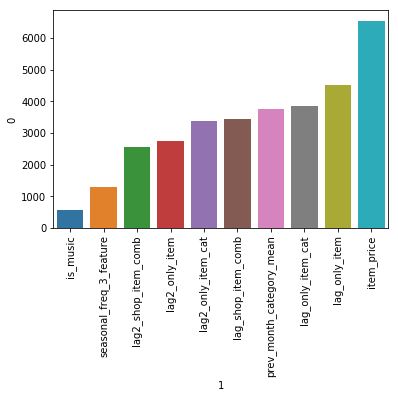

In [135]:
plt.figure()
for_plot.sort_values(0,inplace=True)
sns.barplot(x = for_plot[1], y =for_plot[0])
plt.xticks(rotation = 90)
plt.show()

In [141]:
np.unique(test_33_imputed_f['item_category_id'].dropna())

array([ 2.,  3.,  5.,  6.,  7.,  9., 11., 12., 15., 16., 19., 20., 21.,
       22., 23., 24., 25., 26., 28., 29., 30., 31., 33., 34., 35., 36.,
       37., 38., 40., 41., 42., 43., 44., 45., 47., 49., 54., 55., 56.,
       57., 58., 60., 61., 62., 63., 64., 65., 67., 69., 70., 71., 72.,
       73., 74., 75., 76., 77., 78., 79., 83.])

In [154]:
#Preparing same feature for test set. using whole train set for dat.
for_test_feature_data = pd.concat([train_33_imputed,val_33_imputed], axis = 0)

In [159]:
for_test_category_encoding_monthly = for_test_feature_data.groupby(['unique','item_category_id'])['item_cnt_month'].mean().reset_index()

In [161]:
for_test_category_encoding_monthly['unique'] = for_test_category_encoding_monthly['unique'] + 1

In [164]:
test_33_imputed_new_feature = test_33_imputed_f.merge(for_test_category_encoding_monthly, how = 'left', on = ['item_category_id','unique'])

In [185]:
test_33_imputed_new_feature.loc[pd.isnull(test_33_imputed_new_feature['item_category_id']), ['lag2_only_item','lag2_only_item_cat','lag2_shop_item_comb','lag_only_item','lag_only_item_cat','lag_shop_item_comb','seasonal_freq_3_feature']] = np.nan

In [186]:
np.isnan(test_33_imputed_new_feature['item_category_id'][1])

True

In [ ]:
#Make all feature except unique nan in test if item_category_id is nan.
test_33_imputed_new_feature

In [174]:
train_33_imputed_copy[(train_33_imputed_copy['item_id']>5037) & (train_33_imputed_copy['item_id']<5400)]

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature,prev_month_category_mean
460,0,5048,0,190.000000,1.0,55,True,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
461,0,5051,0,180.000000,1.0,55,True,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
462,0,5065,0,110.000000,1.0,55,True,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
463,0,5068,0,1509.000000,2.0,75,True,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
464,0,5197,0,483.000000,1.0,21,False,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
465,0,5198,0,483.000000,1.0,21,False,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
466,0,5224,0,177.000000,3.0,30,False,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
467,0,5228,0,177.000000,20.0,30,False,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
468,0,5256,0,589.000000,2.0,19,False,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
469,0,5260,0,389.000000,2.0,30,False,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.063765,NaN
